In [35]:
%reset -f

In [36]:
import numpy as np
from matplotlib.pyplot import *
from matplotlib.patches import Polygon

rc('text', usetex=True)
rc('font', family='serif')
labelsize=15

In [37]:
from scipy.spatial import Delaunay
import numpy as np


def alpha_shape(points, alpha, only_outer=True):
    """
    Compute the alpha shape (concave hull) of a set of points.
    :param points: np.array of shape (n,2) points.
    :param alpha: alpha value.
    :param only_outer: boolean value to specify if we keep only the outer border
    or also inner edges.
    :return: set of (i,j) pairs representing edges of the alpha-shape. (i,j) are
    the indices in the points array.
    """
    assert points.shape[0] > 3, "Need at least four points"

    def add_edge(edges, i, j):
        """
        Add an edge between the i-th and j-th points,
        if not in the list already
        """
        if (i, j) in edges or (j, i) in edges:
            # already added
            assert (j, i) in edges, "Can't go twice over same directed edge right?"
            if only_outer:
                # if both neighboring triangles are in shape, it's not a boundary edge
                edges.remove((j, i))
            return
        edges.add((i, j))

    tri = Delaunay(points)
    edges = set()
    # Loop over triangles:
    # ia, ib, ic = indices of corner points of the triangle
    for ia, ib, ic in tri.vertices:
        pa = points[ia]
        pb = points[ib]
        pc = points[ic]
        # Computing radius of triangle circumcircle
        # www.mathalino.com/reviewer/derivation-of-formulas/derivation-of-formula-for-radius-of-circumcircle
        a = np.sqrt((pa[0] - pb[0]) ** 2 + (pa[1] - pb[1]) ** 2)
        b = np.sqrt((pb[0] - pc[0]) ** 2 + (pb[1] - pc[1]) ** 2)
        c = np.sqrt((pc[0] - pa[0]) ** 2 + (pc[1] - pa[1]) ** 2)
        s = (a + b + c) / 2.0
        area = np.sqrt(s * (s - a) * (s - b) * (s - c))
        circum_r = a * b * c / (4.0 * area)
        if circum_r < alpha:
            add_edge(edges, ia, ib)
            add_edge(edges, ib, ic)
            add_edge(edges, ic, ia)
    return edges

# start

In [38]:
import h5py

f1  = h5py.File(r"scan-mass-data\masspoints_r2_0.1.h5", 'r')   # 'r' means that hdf5 file is open in read-only mode
pointsA=np.copy(f1[u'm1m2inGeV'])
f1.close()

f1  = h5py.File(r"scan-mass-data\masspoints_r2_0.2.h5", 'r')   # 'r' means that hdf5 file is open in read-only mode
pointsB=np.copy(f1[u'm1m2inGeV'])
f1.close()

f1  = h5py.File(r"scan-mass-data\masspoints_r2_0.5.h5", 'r')   # 'r' means that hdf5 file is open in read-only mode
pointsC=np.copy(f1[u'm1m2inGeV'])
f1.close()



In [39]:
def put_in_order(edges):
    edgeslist=np.array(list((edges)));
    edgeslist_ord=[]
    i,j=edgeslist[0]
    for counter in edgeslist:
        nextitem_pos = np.where(edgeslist[:,0]==j)
        i,j=edgeslist[nextitem_pos[0][0]]
        edgeslist_ord.append([i,j])
    return np.array(edgeslist_ord)

def get_edge_points(points):
    
    edges = alpha_shape(points, alpha=9999.0, only_outer=True)
    print "edges points:",len(edges)
    edges_in_order=put_in_order(edges)
    points_in_order=points[edges_in_order[:,0]]
    return points_in_order

In [40]:
pointsA_edge=get_edge_points(pointsA);
pointsB_edge=get_edge_points(pointsB);
pointsC_edge=get_edge_points(pointsC);

edges points: 36
edges points: 36
edges points: 36


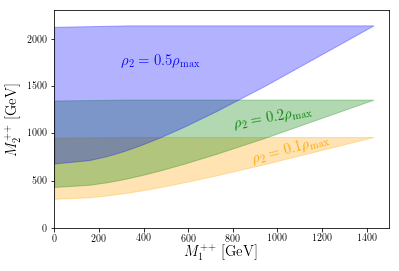

In [44]:
fig, ax =subplots()
alp_points=0.0

colorA='orange';
colorB='g';
colorC='b'
plot(pointsA[:,0], pointsA[:,1], '.',color=colorA,alpha=alp_points)
plot(pointsB[:,0], pointsB[:,1], '.',color=colorB,alpha=alp_points)
plot(pointsC[:,0], pointsC[:,1], '.',color=colorC,alpha=alp_points)

# Make the shaded region
poly = Polygon(pointsA_edge, facecolor=colorA, edgecolor=colorA,alpha=0.3)
ax.add_patch(poly)

poly = Polygon(pointsB_edge, facecolor=colorB, edgecolor=colorB,alpha=0.3)
ax.add_patch(poly)

poly = Polygon(pointsC_edge, facecolor=colorC, edgecolor=colorC,alpha=0.3)
ax.add_patch(poly)

text(880,880,r'$\rho_2=0.1 \rho_{\max}$',color=colorA,fontsize=labelsize,rotation=15)
text(800,1180,r'$\rho_2=0.2 \rho_{\max}$',color=colorB,fontsize=labelsize,rotation=10)
text(300,1700,r'$\rho_2=0.5 \rho_{\max}$',color=colorC,fontsize=labelsize)

ylim(0,2300)
xlim(0,1500)

xlabel(r'$M_{1}^{++}$ [GeV]',fontsize=labelsize)
ylabel(r'$M_{2}^{++}$ [GeV]',fontsize=labelsize)
savefig(r"D:\Dropbox\mywork\LR-scalar\LR-V\fig\M1_M2.pdf")
show()

# Debug

D:\python\anacondaProgram\lib\site-packages\ipykernel_launcher.py:46: RuntimeWarning: divide by zero encountered in double_scalars


edges points: 36


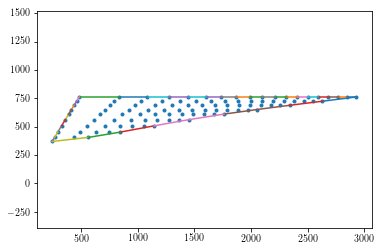

In [103]:
points=pointsA[:]

# Plotting the output
figure()
axis('equal')
plot(points[:, 0], points[:, 1], '.')

# Computing the alpha shape
edges = alpha_shape(points, alpha=999.9, only_outer=True)
print "edges points:",len(edges)
for i, j in edges:
    plot(points[[i, j], 0], points[[i, j], 1])
show()

In [91]:
# def createpolygons(points):
    
#     edges = alpha_shape(points, alpha=999.0, only_outer=True)
#     print "edges points:",len(edges)
#     edges_in_order=put_in_order(edges)
#     points_in_order=points[edges_in_order[:,0]]
#     print points_in_order
#     polygon = Polygon(points_in_order, True,color="b",alpha=0.5)
#     return polygon